Primeras filas del dataset:
     fecha  tasa_paro  poblacion  PIB  coste_laboral   IPC  empresas_creadas  \
0  2000-Q1      14.79     33.534  5.4          11.41  3.17             35339   
1  2000-Q2      13.74     33.652  5.4          12.31  3.63             30965   
2  2000-Q3      13.54     33.770  5.2          13.42  4.03             22705   
3  2000-Q4      13.42     33.888  5.1          13.41  3.80             26484   
4  2001-Q1      10.94     34.007  4.5          11.82  4.13             33498   

   salario_medio  contratos_indefinidos  
0           1334                 334411  
1           1298                 336281  
2           1444                 288541  
3           1303                 326883  
4           1370                 299529  

📌 Tipos de datos de cada columna:
fecha                     object
tasa_paro                float64
poblacion                float64
PIB                      float64
coste_laboral            float64
IPC                      float64
empres

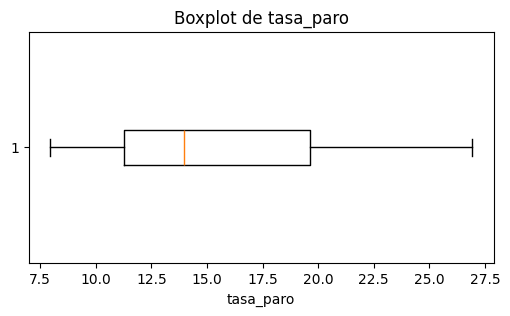

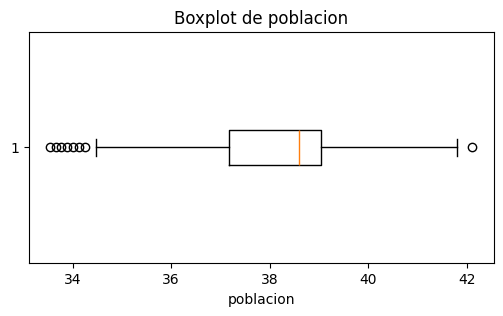

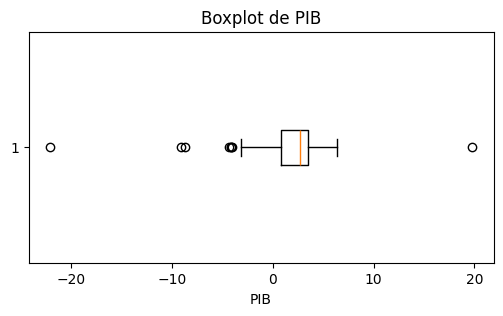

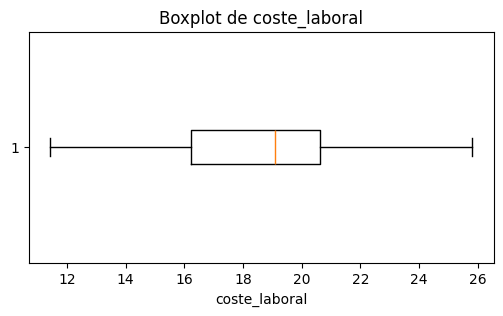

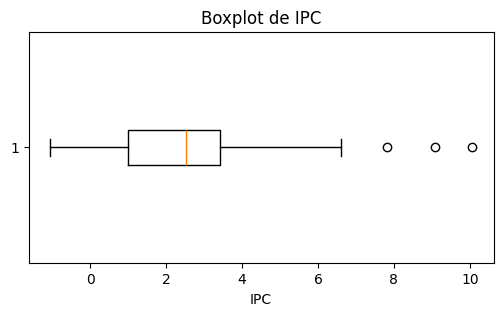

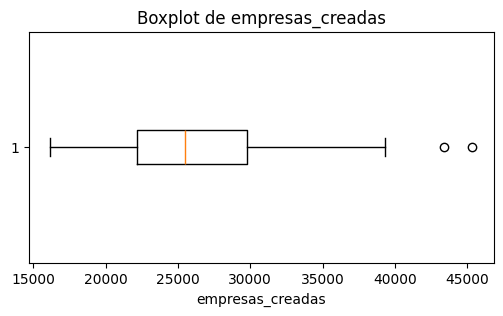

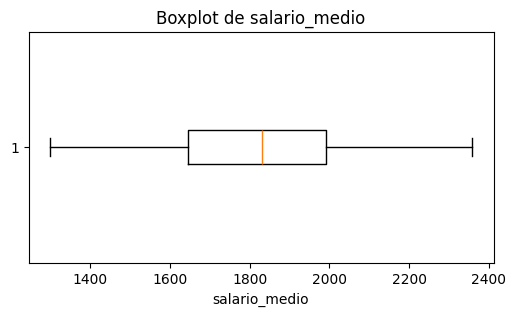

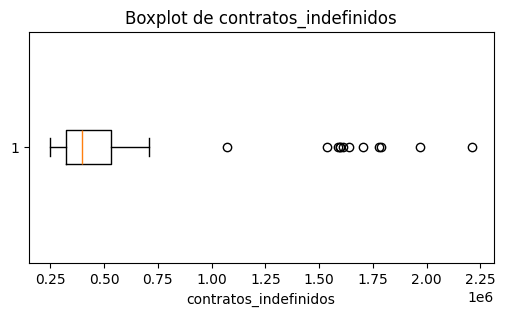

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo
file_path = "/content/tabla_paro_ordenada.xlsx"

# Leer el archivo Excel
df = pd.read_excel(file_path)

# Mostrar los primeros registros
print("Primeras filas del dataset:")
print(df.head())

# 1️ Obtener el tipo de dato de cada columna
print(" Tipos de datos de cada columna:")
print(df.dtypes)

# 2️ Contar valores nulos en cada columna
print("Valores nulos por columna:")
print(df.isnull().sum())

# 3️ Detectar outliers usando el método de rango intercuartil
def detectar_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include=[np.number]):  # Solo columnas numéricas
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    return outliers

outliers = detectar_outliers_iqr(df)

print("Número de outliers detectados por columna numérica:")
print(outliers)

# 4️ Visualización de outliers con boxplots
for col in df.select_dtypes(include=[np.number]):
    plt.figure(figsize=(6, 3))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.show()


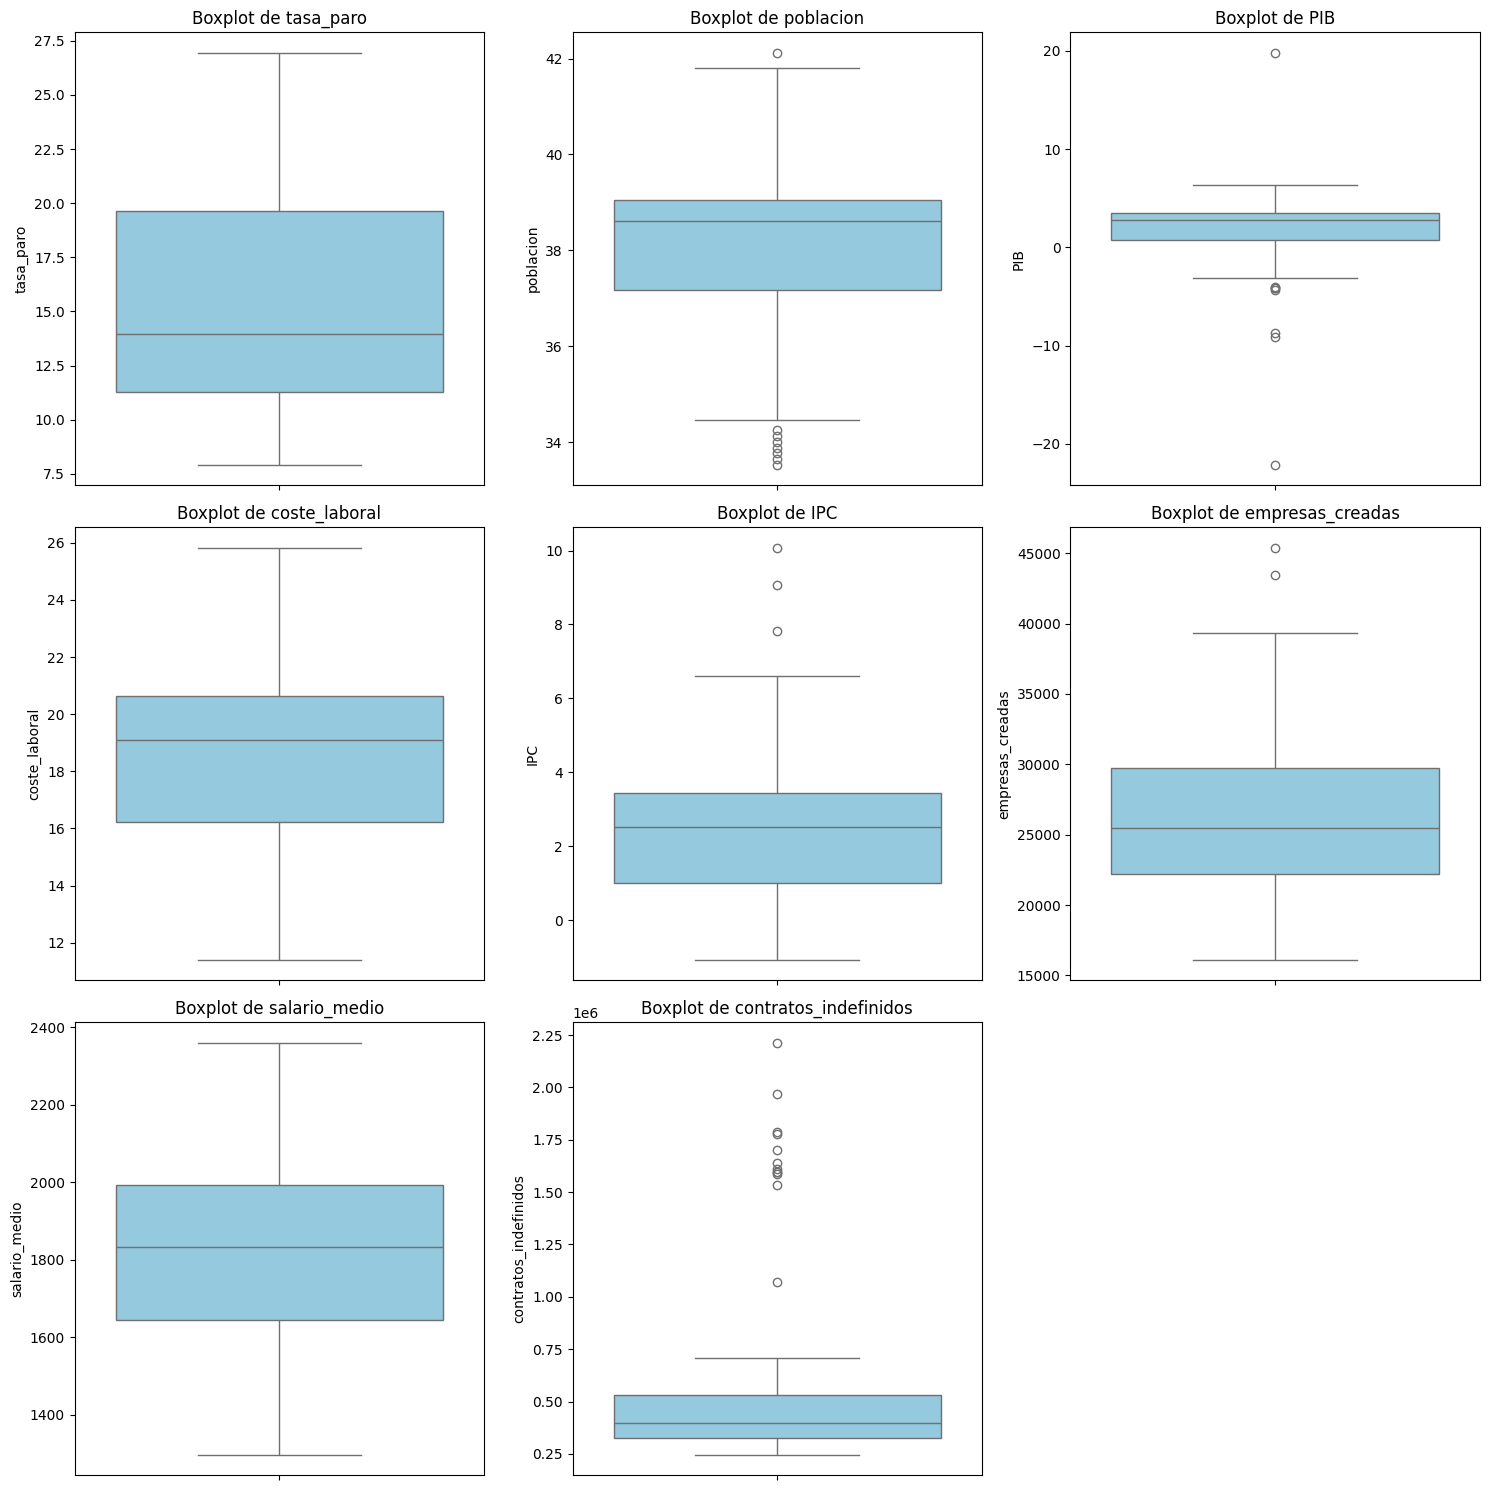

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Definir el número de filas y columnas para la visualización
num_variables = len(df_numerico.columns)
filas = (num_variables // 3) + (num_variables % 3 > 0)  # Organizar en filas de 3 gráficos por fila

# Crear la figura con subgráficos
fig, axes = plt.subplots(filas, 3, figsize=(15, 5 * filas))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

# Generar un boxplot para cada variable numérica
for i, columna in enumerate(df_numerico.columns):
    sns.boxplot(y=df_numerico[columna], color="skyblue", ax=axes[i])
    axes[i].set_title(f'Boxplot de {columna}')
    axes[i].set_ylabel(columna)

# Eliminar gráficos vacíos si hay menos de 3 variables por fila
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

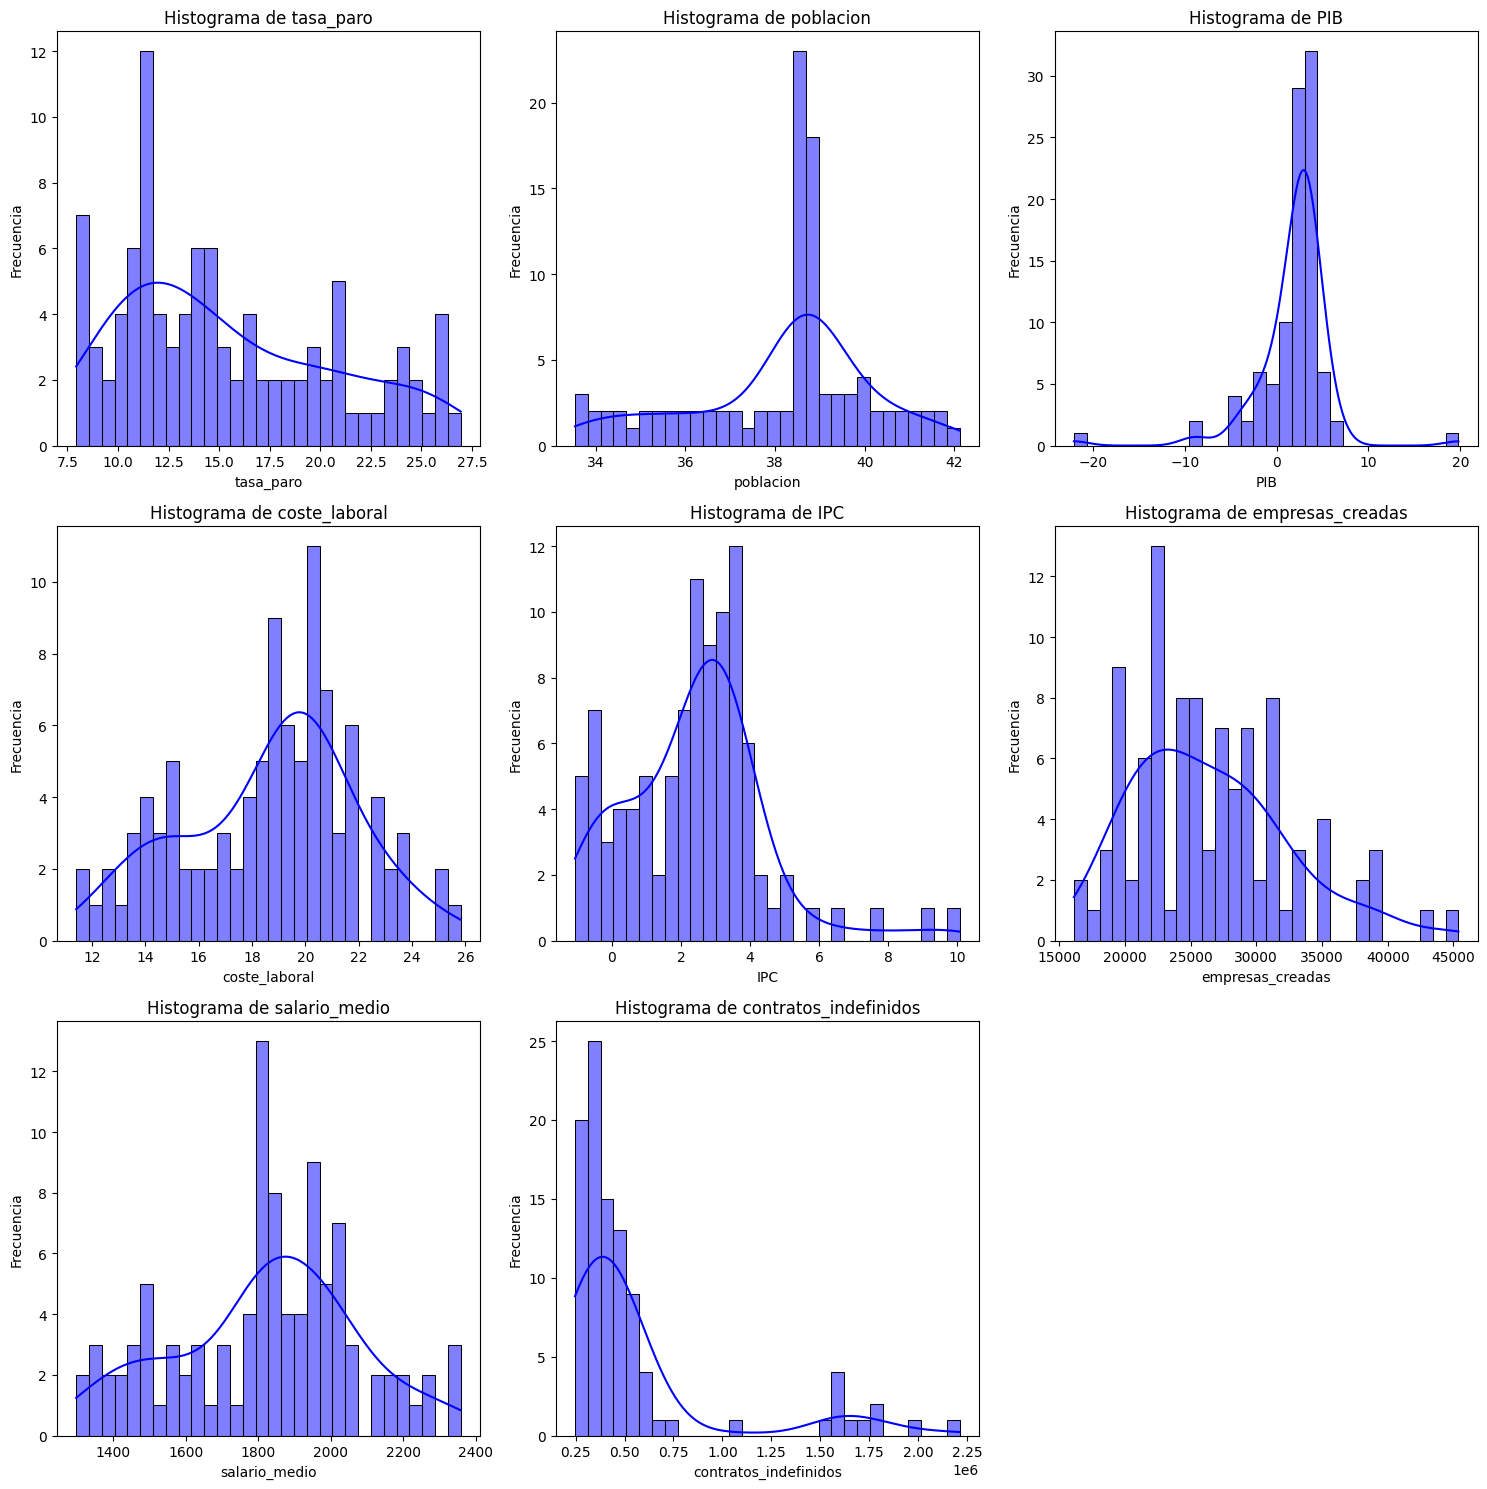

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Definir el número de filas y columnas para la visualización
num_variables = len(df_numerico.columns)
filas = (num_variables // 3) + (num_variables % 3 > 0)  # Organizar en filas de 3 gráficos por fila

# Crear la figura con subgráficos
fig, axes = plt.subplots(filas, 3, figsize=(15, 5 * filas))
axes = axes.flatten()  # Aplanar la matriz de ejes

# Generar un histograma para cada variable numérica
for i, columna in enumerate(df_numerico.columns):
    sns.histplot(df_numerico[columna], bins=30, kde=True, color="blue", ax=axes[i])
    axes[i].set_title(f'Histograma de {columna}')
    axes[i].set_xlabel(columna)
    axes[i].set_ylabel('Frecuencia')

# Eliminar gráficos vacíos si hay menos de 3 variables por fila
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()


📌 Se detectó la columna de fecha: fecha


<ipython-input-4-28914b60fdfe>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[fecha_col] = pd.to_datetime(df[fecha_col])  # Convertir a formato datetime


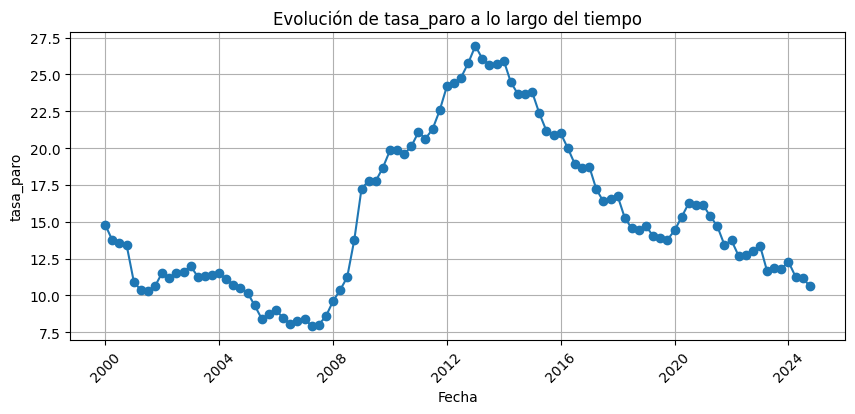

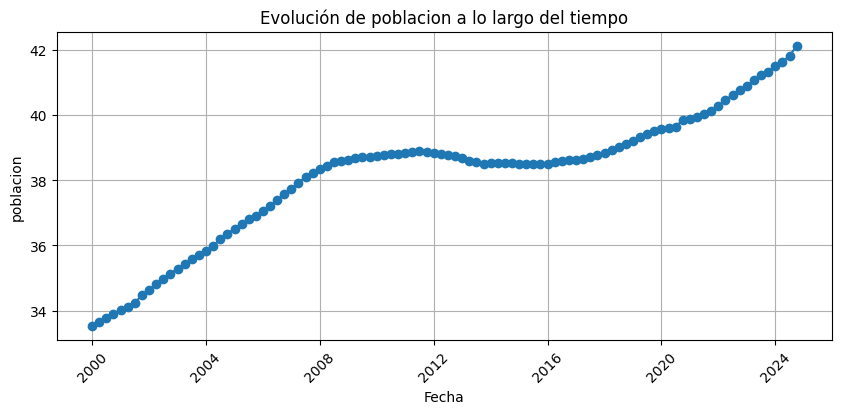

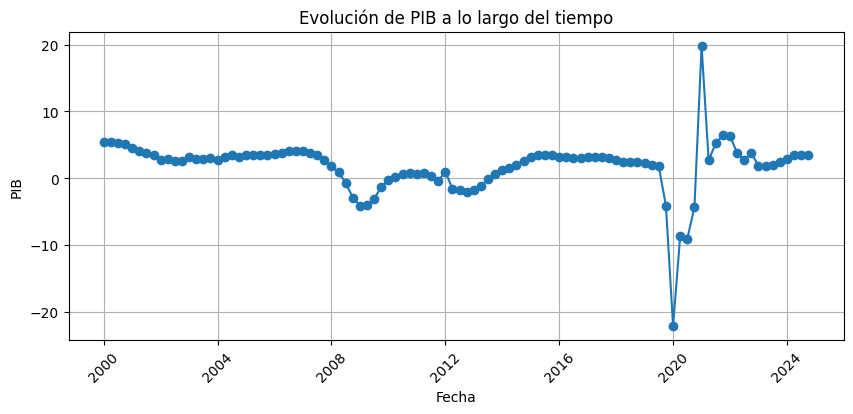

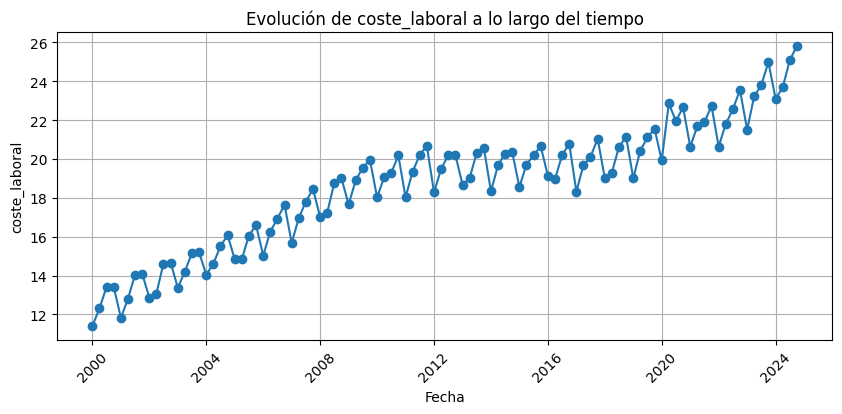

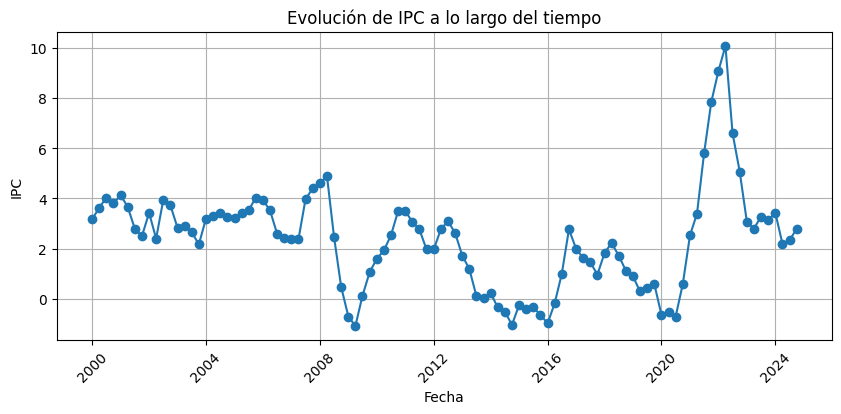

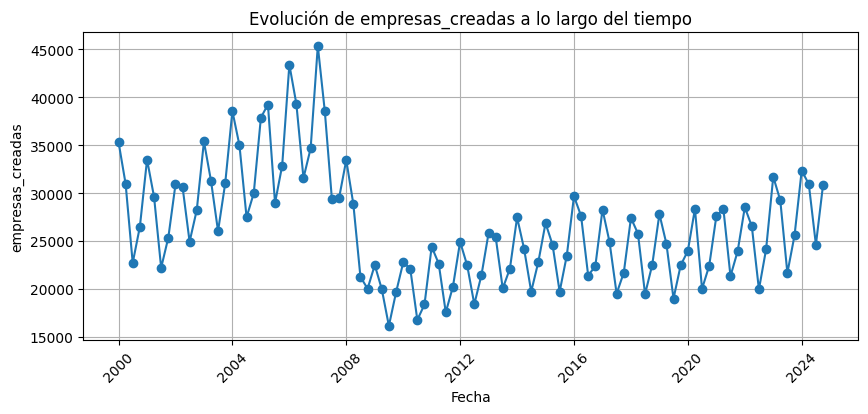

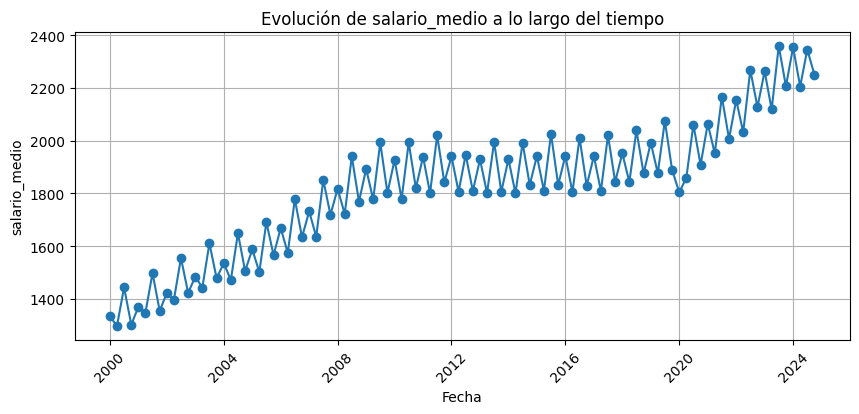

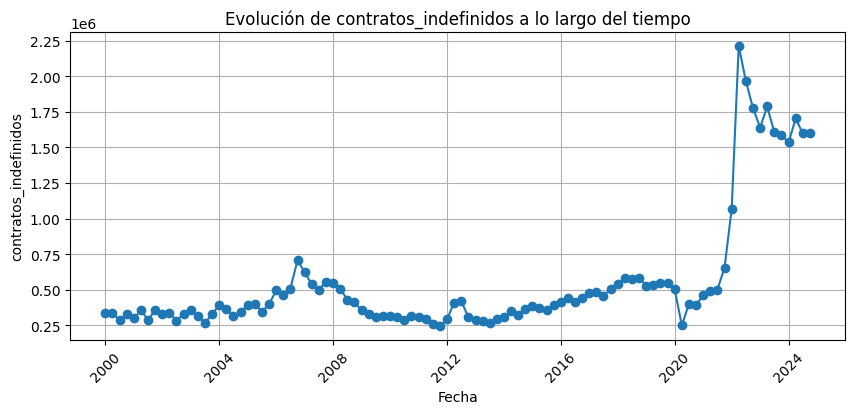

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo
file_path = "/content/tabla_paro_ordenada.xlsx"
df = pd.read_excel(file_path)

# Detectar la columna de fecha automáticamente
df_fecha = df.select_dtypes(include=['datetime', 'object'])  # Buscar columnas de fechas

if len(df_fecha.columns) > 0:
    fecha_col = df_fecha.columns[0]  # Tomar la primera columna de tipo fecha u objeto
    print(f"Se detectó la columna de fecha: {fecha_col}")
    df[fecha_col] = pd.to_datetime(df[fecha_col])  # Convertir a formato datetime
    df = df.sort_values(by=fecha_col)  # Ordenar por fecha
else:
    raise ValueError("No se detectó una columna de fecha.")

# Graficar cada variable numérica a lo largo del tiempo
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 4))
    plt.plot(df[fecha_col], df[col], marker='o', linestyle='-')
    plt.xlabel("Fecha")
    plt.ylabel(col)
    plt.title(f"Evolución de {col} a lo largo del tiempo")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Cargar el archivo
file_path = "/content/tabla_paro_ordenada.xlsx"
df = pd.read_excel(file_path)

# Filtrar solo columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# 1️ Medidas de Tendencia Central
tendencia_central = pd.DataFrame({
    'Media': df_numeric.mean(),
    'Mediana': df_numeric.median(),
    'Moda': df_numeric.mode().iloc[0]  # Se toma la primera moda en caso de múltiples
})
print("Medidas de Tendencia Central:")
display(tendencia_central)

# 2️ Medidas de Dispersión
dispersion = pd.DataFrame({
    'Varianza': df_numeric.var(),
    'Desviación Estándar': df_numeric.std(),
    'Rango': df_numeric.max() - df_numeric.min(),
    'Coeficiente de Variación (%)': (df_numeric.std() / df_numeric.mean()) * 100
})
print("\n Medidas de Dispersión:")
display(dispersion)

# 3️ Medidas de Forma
forma = pd.DataFrame({
    'Asimetría (Skewness)': df_numeric.apply(stats.skew),
    'Curtosis': df_numeric.apply(stats.kurtosis)
})
print("Medidas de Forma:")
display(forma)




📊 Medidas de Tendencia Central:


,Media,Mediana,Moda
tasa_paro,15.40520,13.9700,7.930
poblacion,38.17101,38.6025,38.523
PIB,1.83400,2.7500,3.500
coste_laboral,18.65560,19.0950,14.040
IPC,2.37910,2.5300,3.430
empresas_creadas,26487.97000,25501.5000,28356.000
salario_medio,1821.49000,1832.0000,1423.000
contratos_indefinidos,553121.91000,397478.0000,246862.000



📊 Medidas de Dispersión:


,Varianza,Desviación Estándar,Rango,Coeficiente de Variación (%)
tasa_paro,2.791611e+01,5.283570,19.010,34.297317
poblacion,3.970693e+00,1.992660,8.583,5.220349
PIB,1.651459e+01,4.063815,41.900,221.582045
coste_laboral,1.041944e+01,3.227916,14.410,17.302665
IPC,4.087340e+00,2.021717,11.140,84.978227
empresas_creadas,3.564140e+07,5970.041951,29250.000,22.538692
salario_medio,6.428670e+04,253.548214,1061.000,13.919825
contratos_indefinidos,1.906972e+11,436688.946251,1965806.000,78.949855



📊 Medidas de Forma:


,Asimetría (Skewness),Curtosis
tasa_paro,0.565440,-0.796678
poblacion,-0.615771,-0.046476
PIB,-1.691970,14.506404
coste_laboral,-0.262893,-0.510865
IPC,0.819996,2.115818
empresas_creadas,0.781230,0.414621
salario_medio,-0.158144,-0.445502
contratos_indefinidos,2.302143,4.079041


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Cargar el archivo
file_path = "/content/tabla_paro_ordenada.xlsx"
df = pd.read_excel(file_path)

# Filtrar solo columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# 1️ Realizar el test de Dickey-Fuller para cada variable numérica
adf_results = []

for col in df_numeric.columns:
    result = adfuller(df_numeric[col].dropna())  # Eliminar NaN antes del test
    adf_stat = result[0]  # Estadístico ADF
    p_value = result[1]  # p-valor
    critical_value = result[4]["5%"]  # Valor crítico al 5%

    # Determinar si la serie es estacionaria
    estacionaria = "Estacionaria" if adf_stat < critical_value and p_value < 0.05 else "No estacionaria"

    adf_results.append([col, adf_stat, p_value, estacionaria])

# Crear DataFrame con los resultados (sin la columna de valor crítico)
adf_table = pd.DataFrame(adf_results, columns=["Variable", "Estadístico ADF", "P-valor", "Resultado"])

# Mostrar la tabla
print(" Resultados del Test de Dickey-Fuller:")
display(adf_table)



📊 Resultados del Test de Dickey-Fuller:


,Variable,Estadístico ADF,P-valor,Resultado
0,tasa_paro,-1.888799,0.337349,No estacionaria
1,poblacion,0.332271,0.978778,No estacionaria
2,PIB,-3.785628,0.003058,Estacionaria
3,coste_laboral,-0.127282,0.946652,No estacionaria
4,IPC,-2.799103,0.058402,No estacionaria
5,empresas_creadas,-2.402670,0.140984,No estacionaria
6,salario_medio,-0.666319,0.855282,No estacionaria
7,contratos_indefinidos,-0.769367,0.827955,No estacionaria


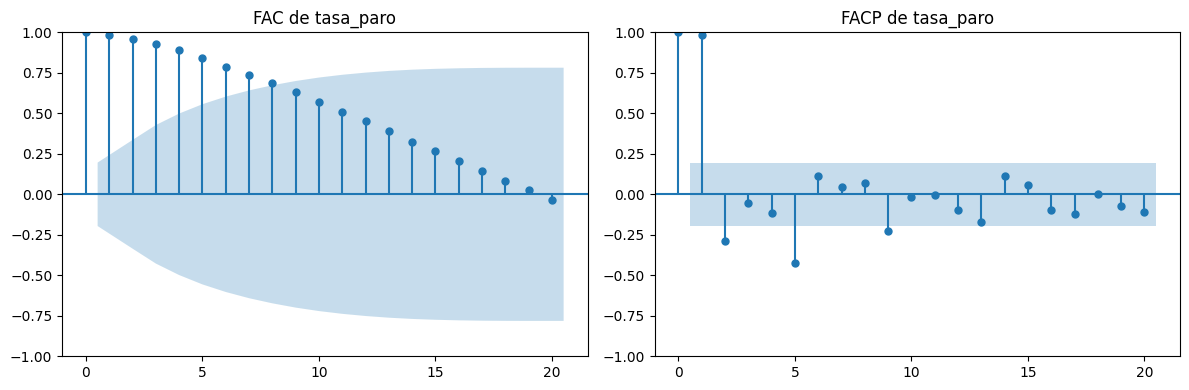

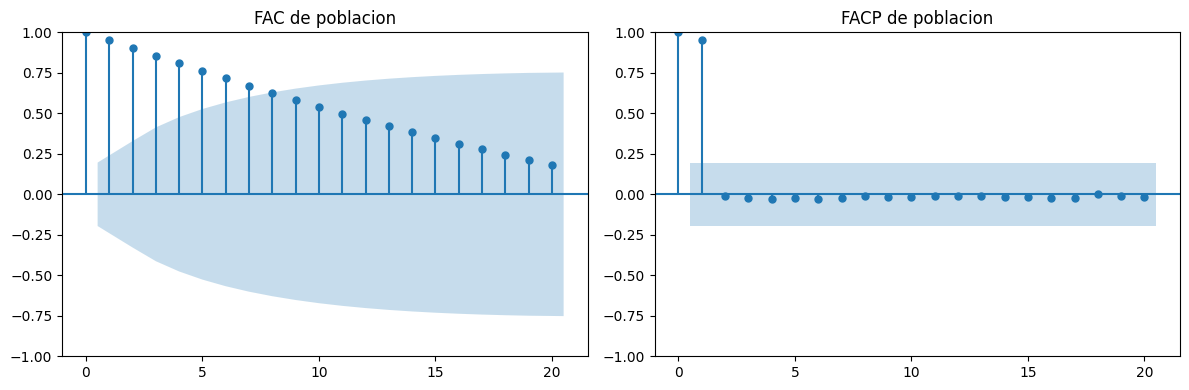

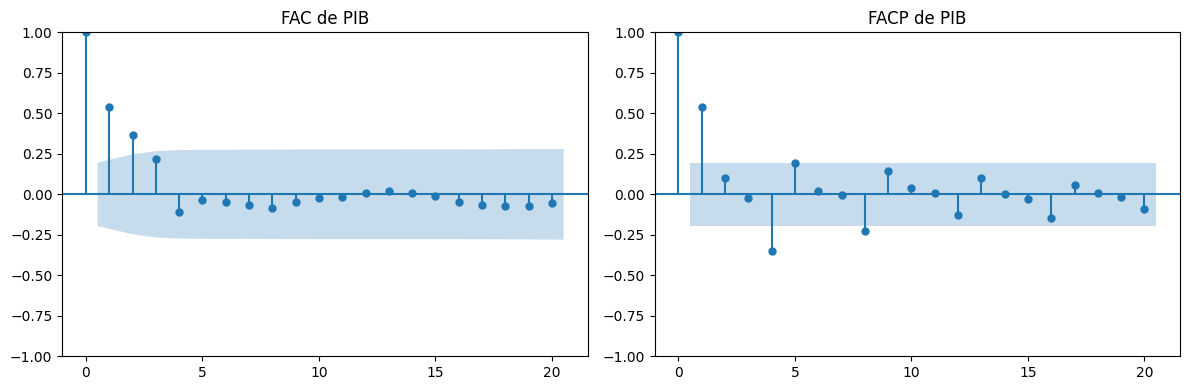

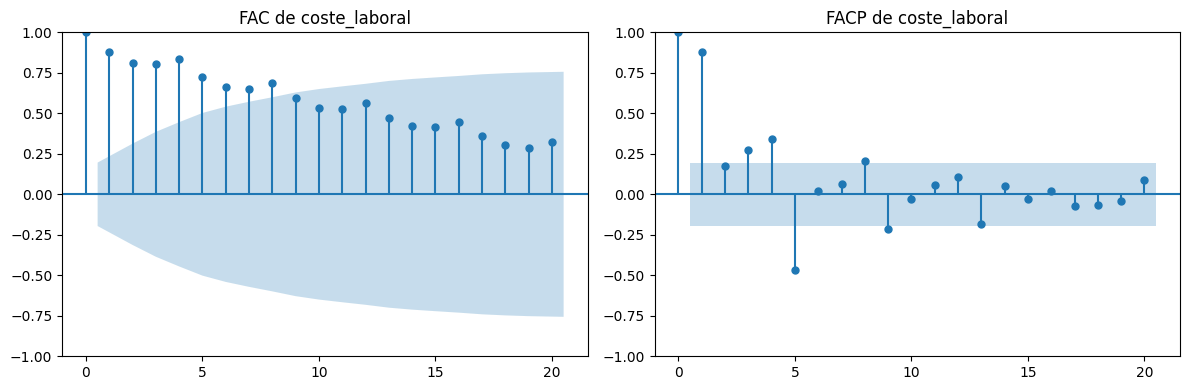

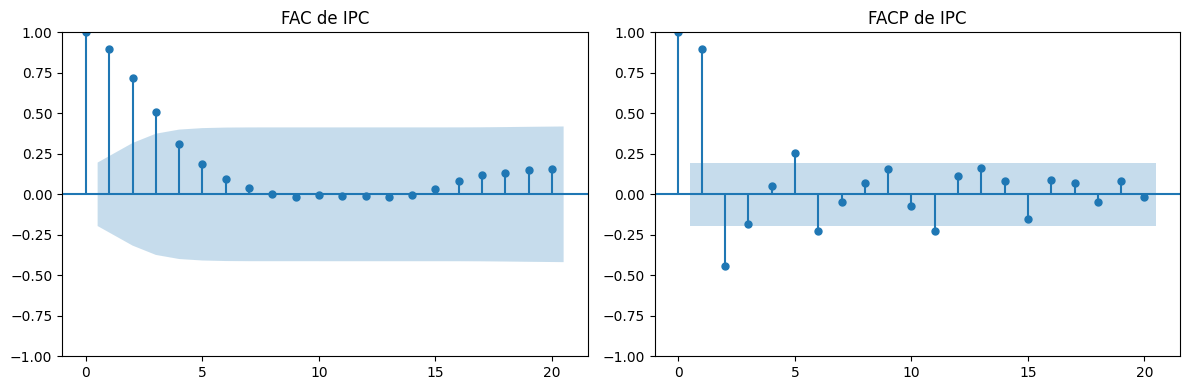

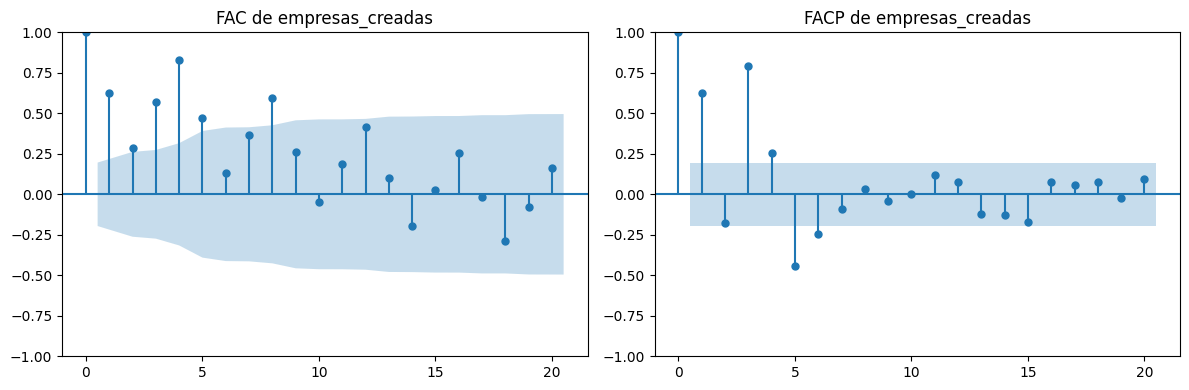

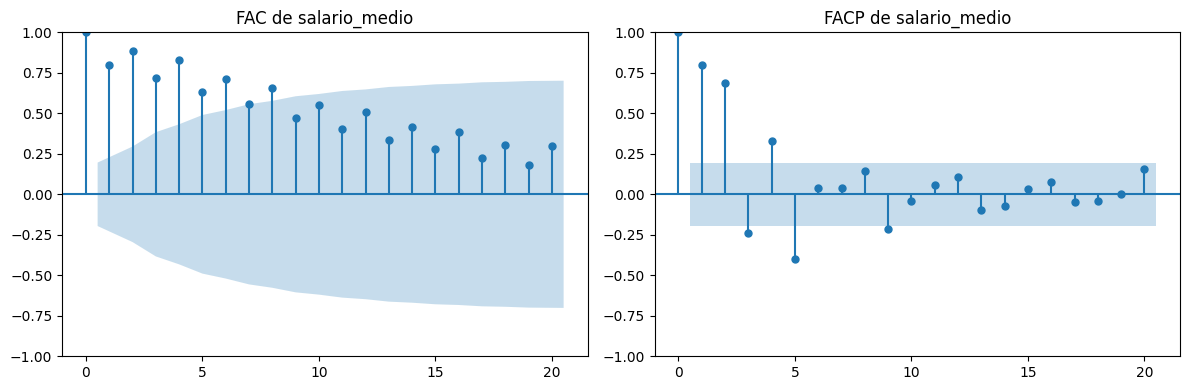

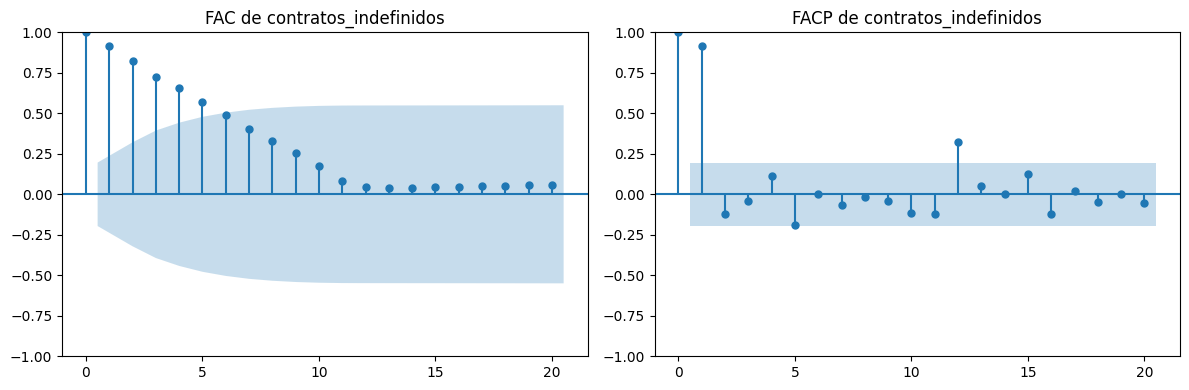

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Cargar el archivo
file_path = "/content/tabla_paro_ordenada.xlsx"
df = pd.read_excel(file_path)

# Filtrar solo columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Graficar FAC y FACP para cada variable numérica
for col in df_numeric.columns:
    plt.figure(figsize=(12, 4))

    # Gráfico de la Función de Autocorrelación (FAC)
    plt.subplot(1, 2, 1)
    plot_acf(df_numeric[col].dropna(), lags=20, ax=plt.gca())
    plt.title(f"FAC de {col}")

    # Gráfico de la Función de Autocorrelación Parcial (FACP)
    plt.subplot(1, 2, 2)
    plot_pacf(df_numeric[col].dropna(), lags=20, ax=plt.gca(), method='ywm')
    plt.title(f"FACP de {col}")

    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Cargar el archivo
file_path = "/content/tabla_paro_ordenada.xlsx"
df = pd.read_excel(file_path)

# Filtrar solo columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

#  Función para determinar el número de diferenciaciones necesarias
def diferencias_necesarias(serie, max_diffs=5):
    """
    Aplica diferencias sucesivas a la serie hasta que sea estacionaria según el test de Dickey-Fuller.
    Retorna el número mínimo de diferenciaciones necesarias.
    """
    diffs = 0
    while diffs < max_diffs:
        result = adfuller(serie.dropna())  # Aplicar test ADF
        adf_stat = result[0]  # Estadístico ADF
        p_value = result[1]  # p-valor
        critical_value = result[4]["5%"]  # Valor crítico al 5%

        # Si la serie ya es estacionaria, devolver el número de diferenciaciones
        if adf_stat < critical_value and p_value < 0.05:
            return diffs

        # Aplicar una diferencia y repetir
        serie = serie.diff().dropna()
        diffs += 1

    return diffs  # Si no se estacionariza en 5 diferencias, devuelve 5

#  Calcular el número de diferenciaciones necesarias para cada variable
differentiation_results = []

for col in df_numeric.columns:
    num_diffs = diferencias_necesarias(df_numeric[col])
    differentiation_results.append([col, num_diffs])

# Crear DataFrame con los resultados
diff_table = pd.DataFrame(differentiation_results, columns=["Variable", "Diferenciaciones necesarias"])

# Mostrar la tabla
print(" Resultados del número de diferenciaciones necesarias:")
display(diff_table)




📊 Resultados del número de diferenciaciones necesarias:


,Variable,Diferenciaciones necesarias
0,tasa_paro,2
1,poblacion,2
2,PIB,0
3,coste_laboral,2
4,IPC,1
5,empresas_creadas,2
6,salario_medio,2
7,contratos_indefinidos,1



✅ Los resultados se han guardado en: /content/differentiation_results.csv


In [ ]:
import pandas as pd
import numpy as np

# Cargar el archivo original
file_path = "/content/tabla_paro_ordenada.xlsx"
df = pd.read_excel(file_path)

# Filtrar solo columnas numéricas
df_numeric = df.select_dtypes(include=[np.number]).copy()

# Aplicar las diferenciaciones necesarias según la tabla de resultados
differentiated_df = df.copy()  # Copia del DataFrame original para mantener las columnas no numéricas

for col in df_numeric.columns:
    num_diffs = diff_table.loc[diff_table["Variable"] == col, "Diferenciaciones necesarias"].values[0]

    # Aplicar diferenciación sucesiva según el número necesario
    differentiated_series = df[col].copy()
    for _ in range(num_diffs):
        differentiated_series = differentiated_series.diff()

    # Guardar la serie diferenciada en el nuevo DataFrame
    differentiated_df[col] = differentiated_series

# Guardar el nuevo archivo Excel con los datos diferenciados
output_path = "/content/tabla_paro_diferenciada.xlsx"
differentiated_df.to_excel(output_path, index=False)

print(f" Archivo Excel guardado: {output_path}")



✅ Archivo Excel guardado: /content/tabla_paro_diferenciada.xlsx



📌 Se detectó la columna de fecha: fecha


<ipython-input-5-ced4736fcf4f>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[fecha_col] = pd.to_datetime(df[fecha_col])  # Convertir a formato datetime


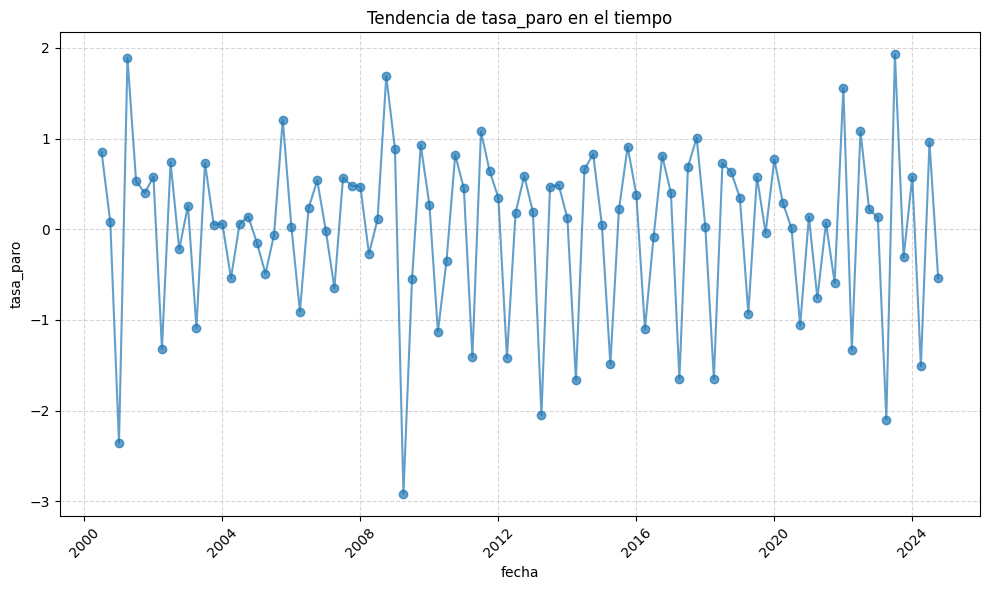

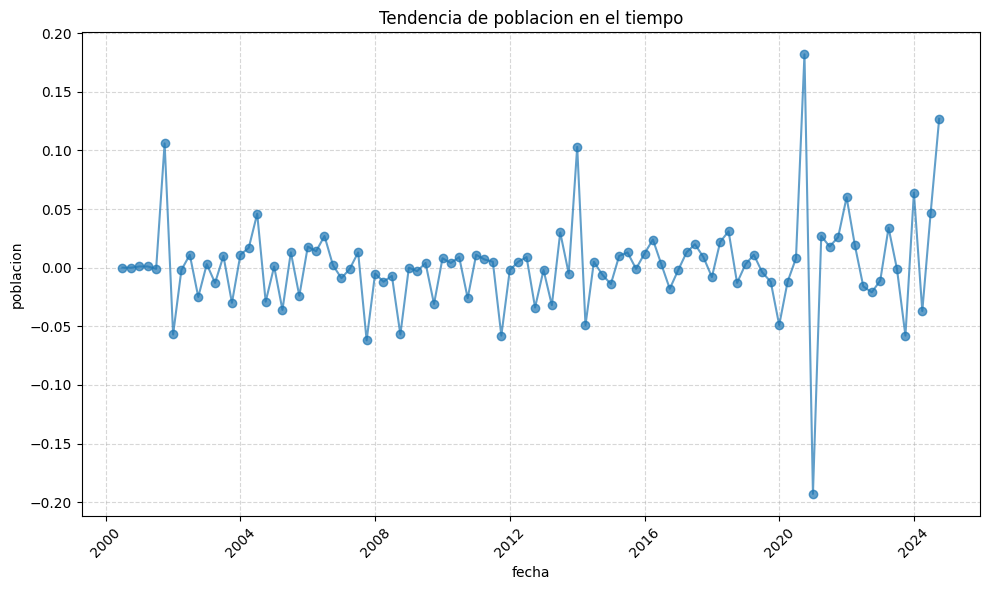

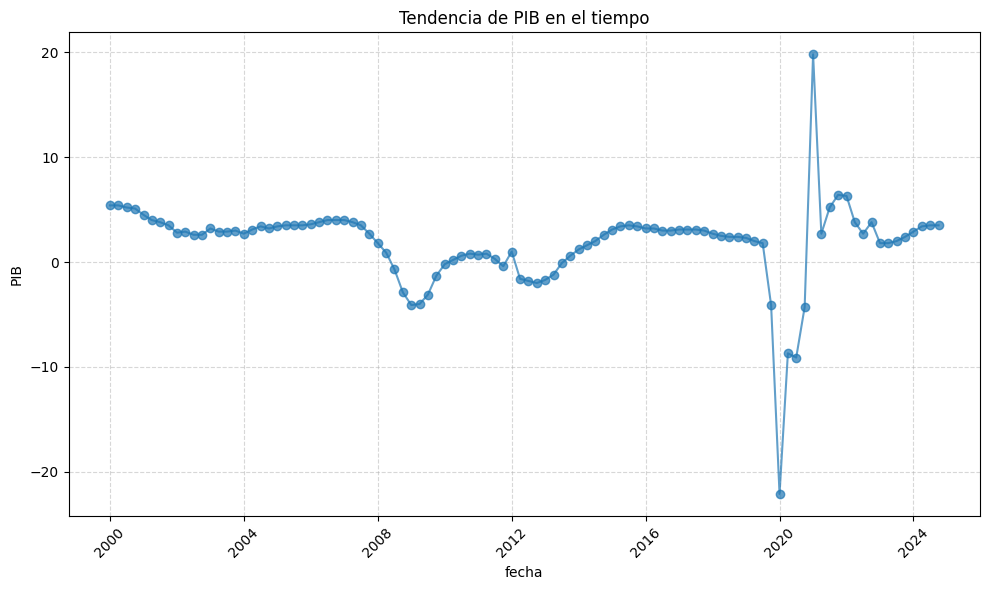

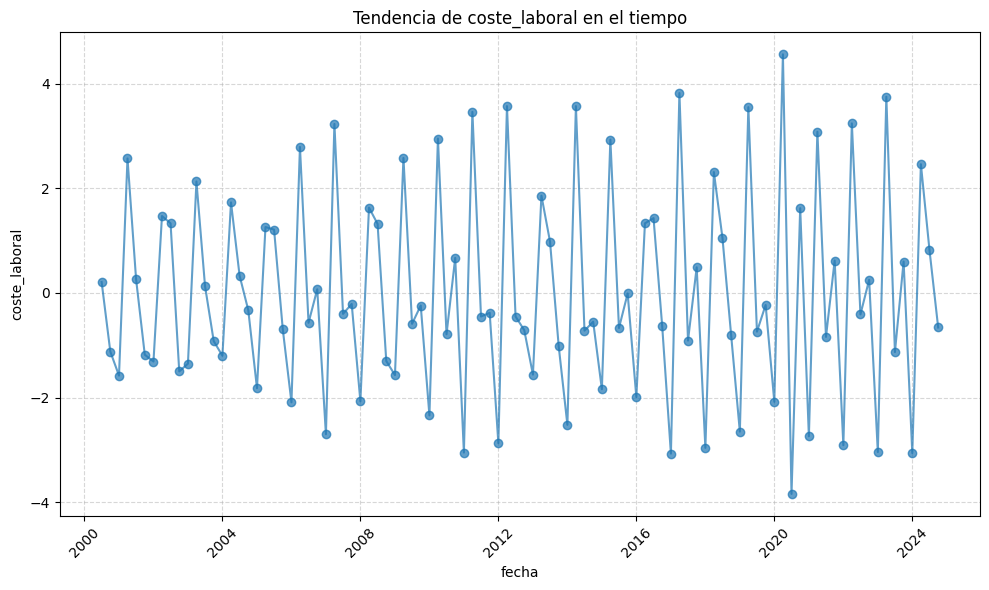

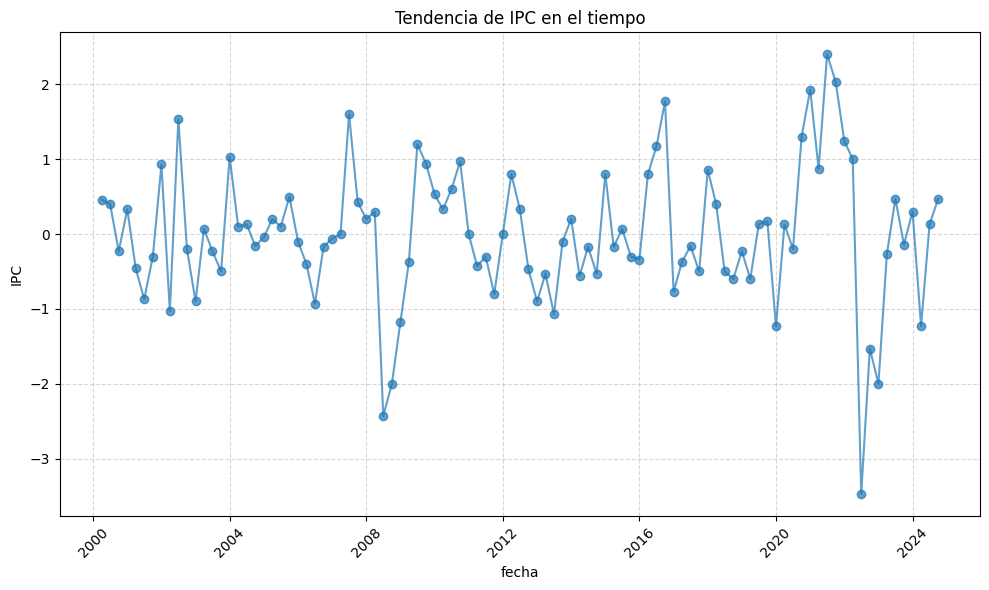

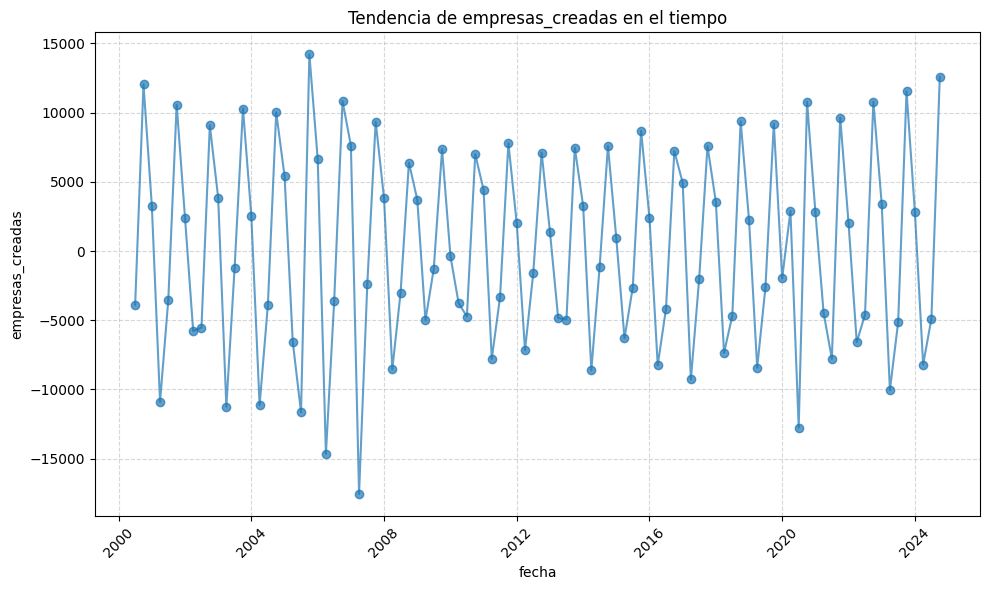

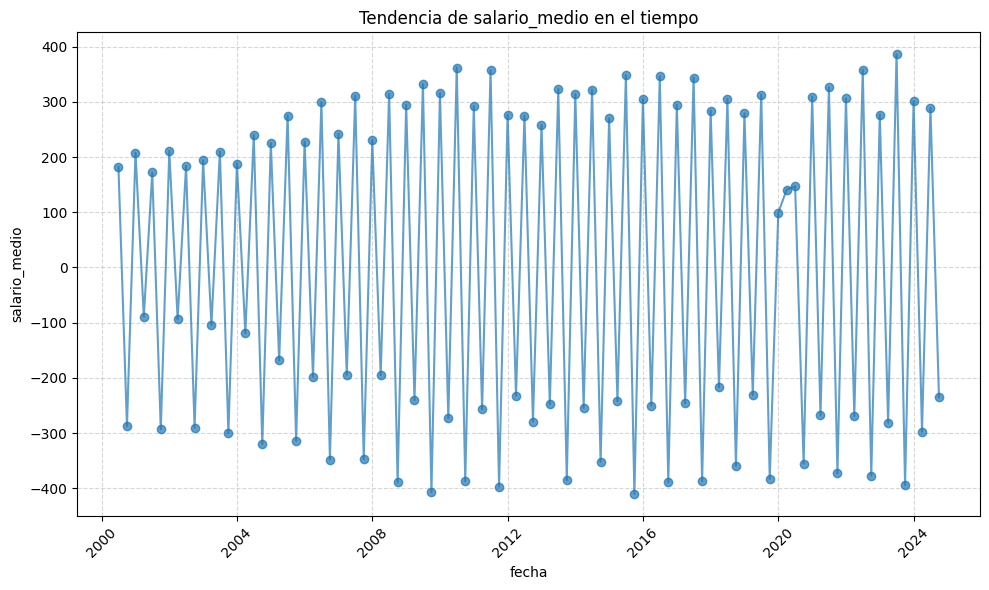

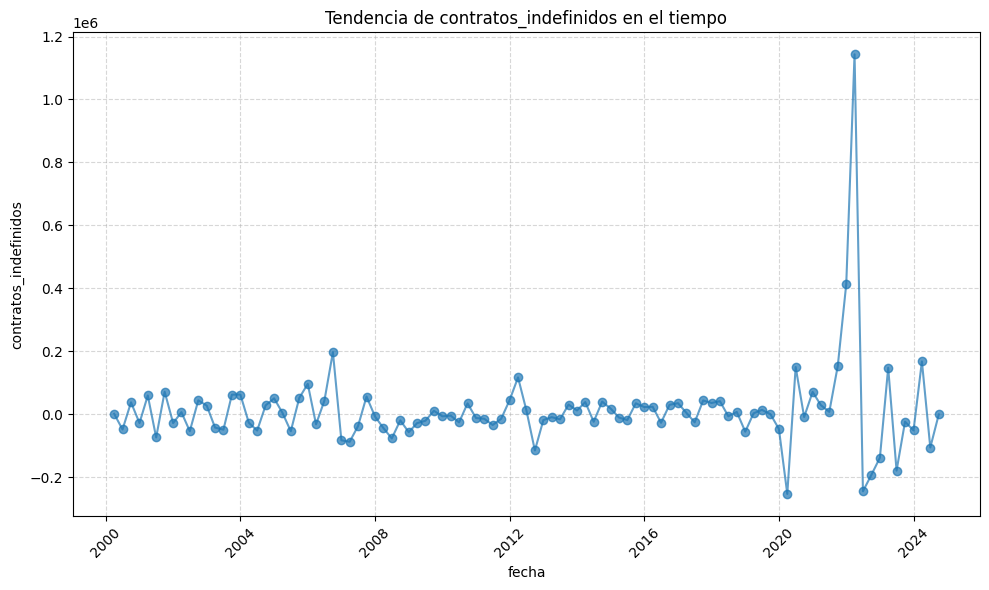

In [ ]:



import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo
file_path = "/content/tabla_paro_diferenciada.xlsx"
df = pd.read_excel(file_path)

# Detectar la columna de fecha automáticamente
df_fecha = df.select_dtypes(include=['datetime', 'object'])  # Buscar columnas de fechas

if len(df_fecha.columns) > 0:
    fecha_col = df_fecha.columns[0]  # Tomar la primera columna de tipo fecha u objeto
    print(f" Se detectó la columna de fecha: {fecha_col}")
    df[fecha_col] = pd.to_datetime(df[fecha_col])  # Convertir a formato datetime
    df = df.sort_values(by=fecha_col)  # Ordenar por fecha
else:
    raise ValueError("No se detectó una columna de fecha.")

# Crear gráficos de líneas para todas las variables numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df['fecha'], df[column], marker='o', linestyle='-', alpha=0.7)
    plt.title(f'Tendencia de {column} en el tiempo')
    plt.xlabel('fecha')
    plt.ylabel(column)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


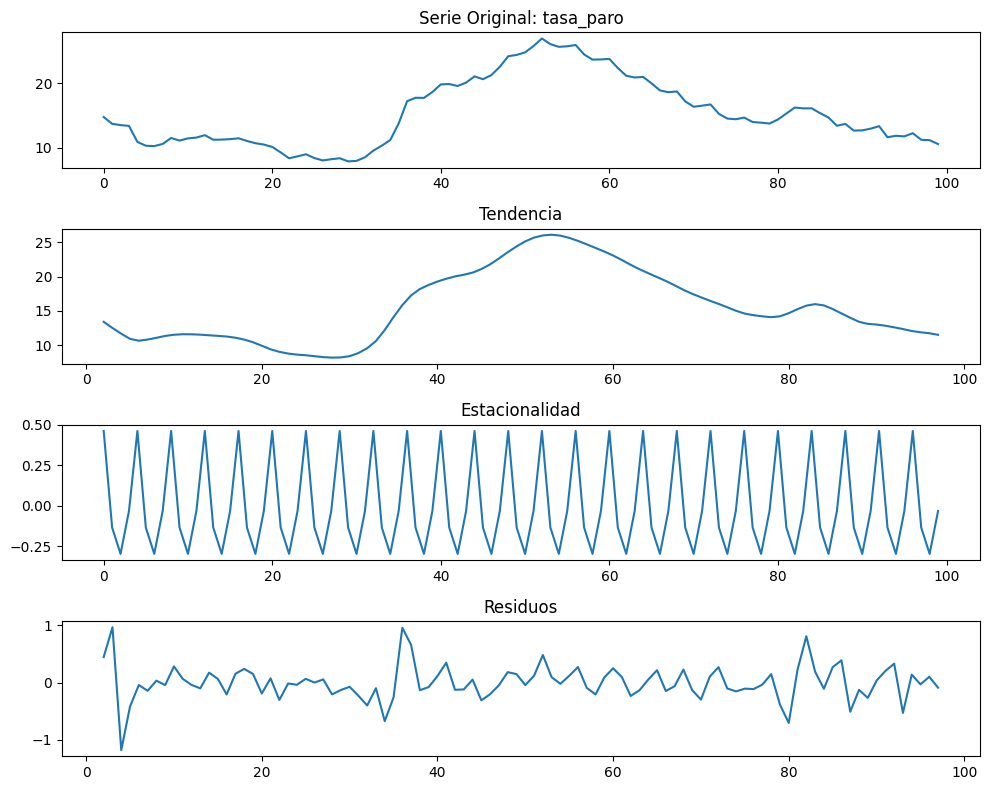

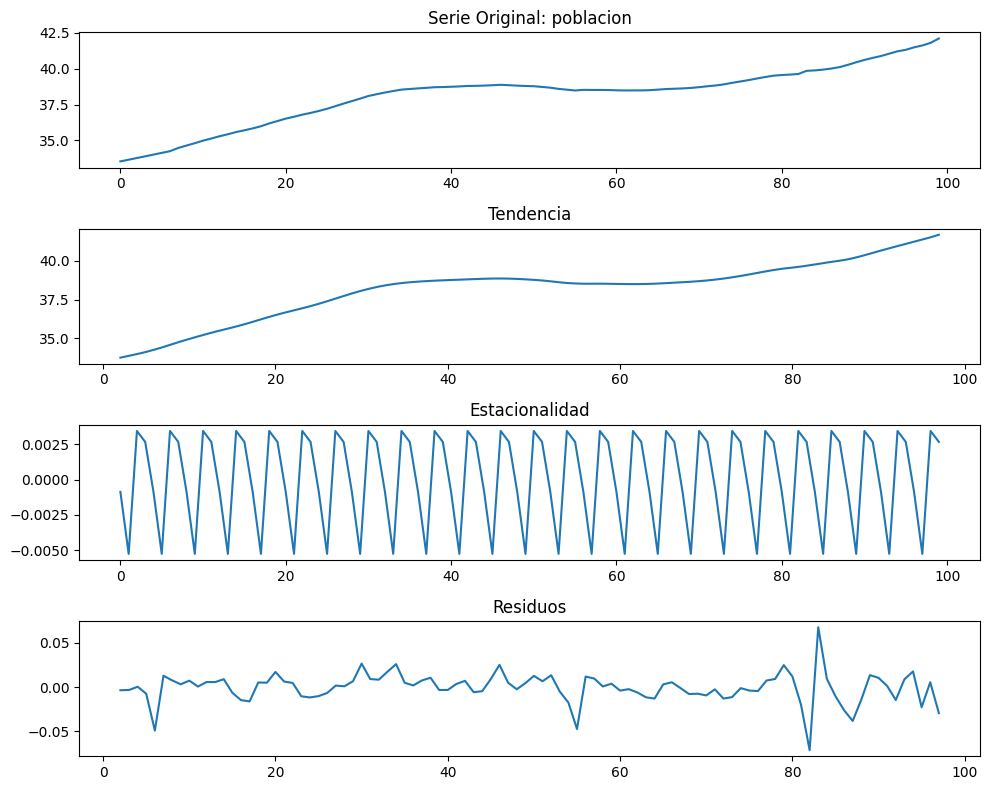

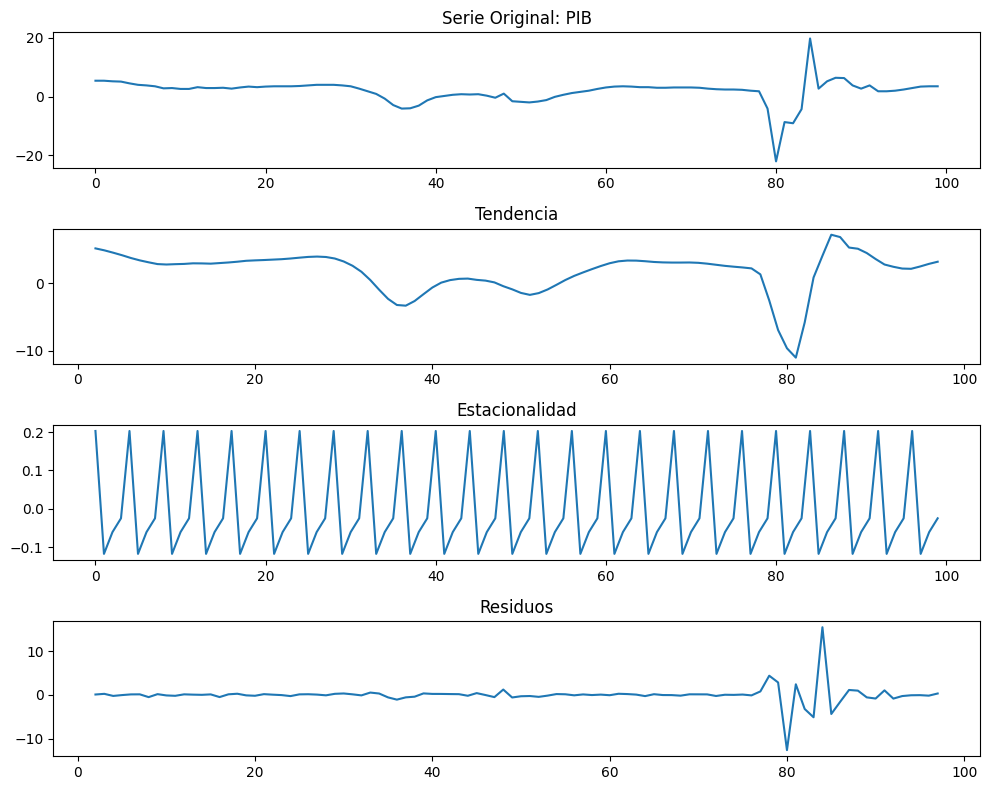

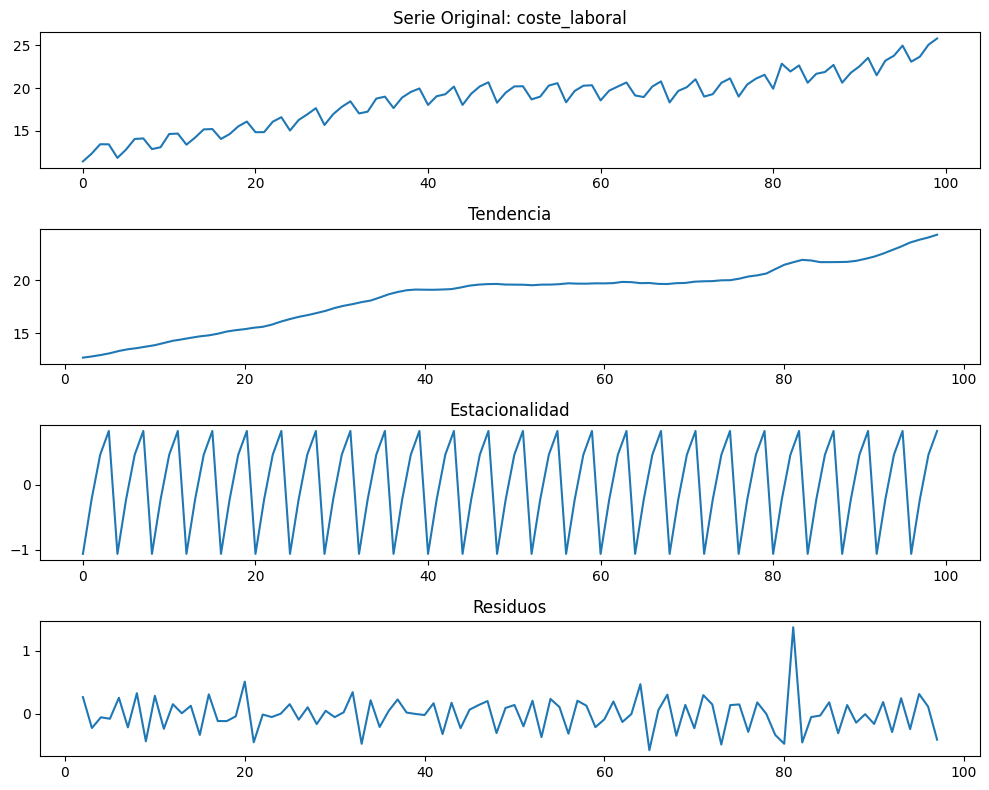

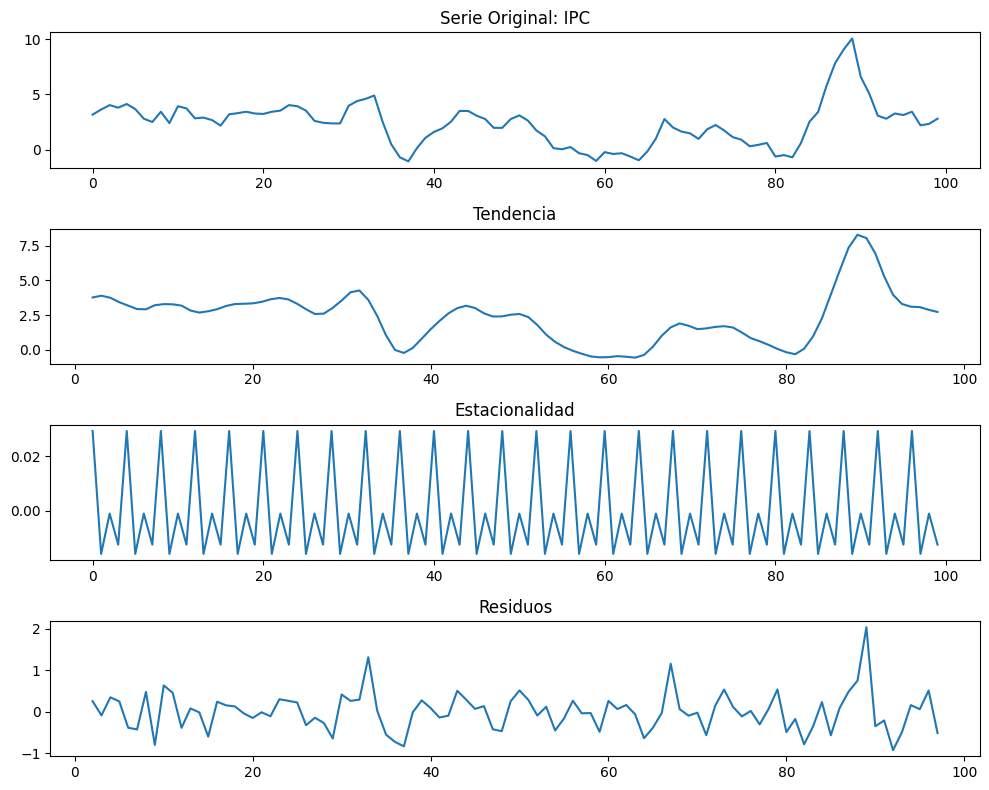

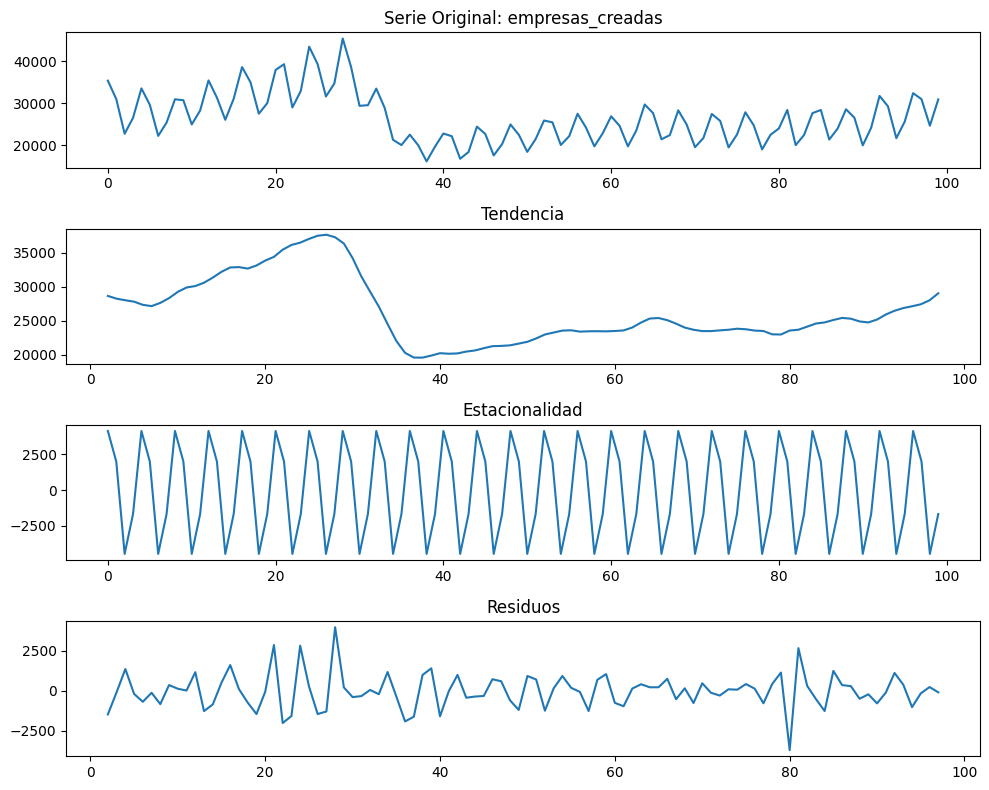

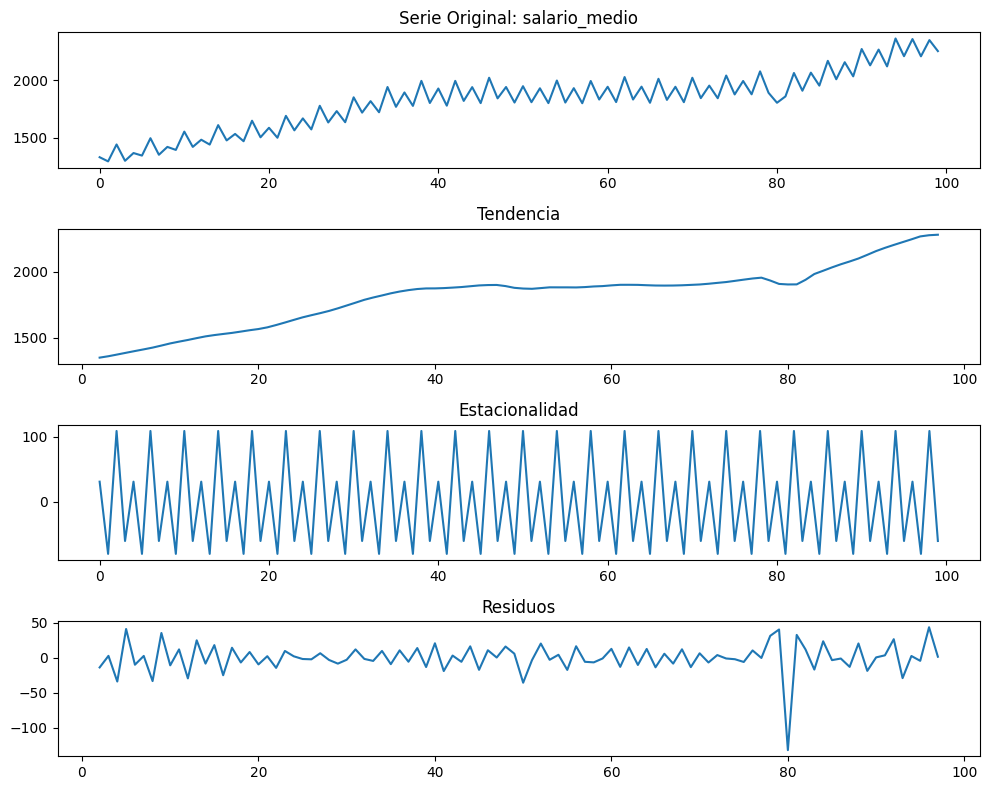

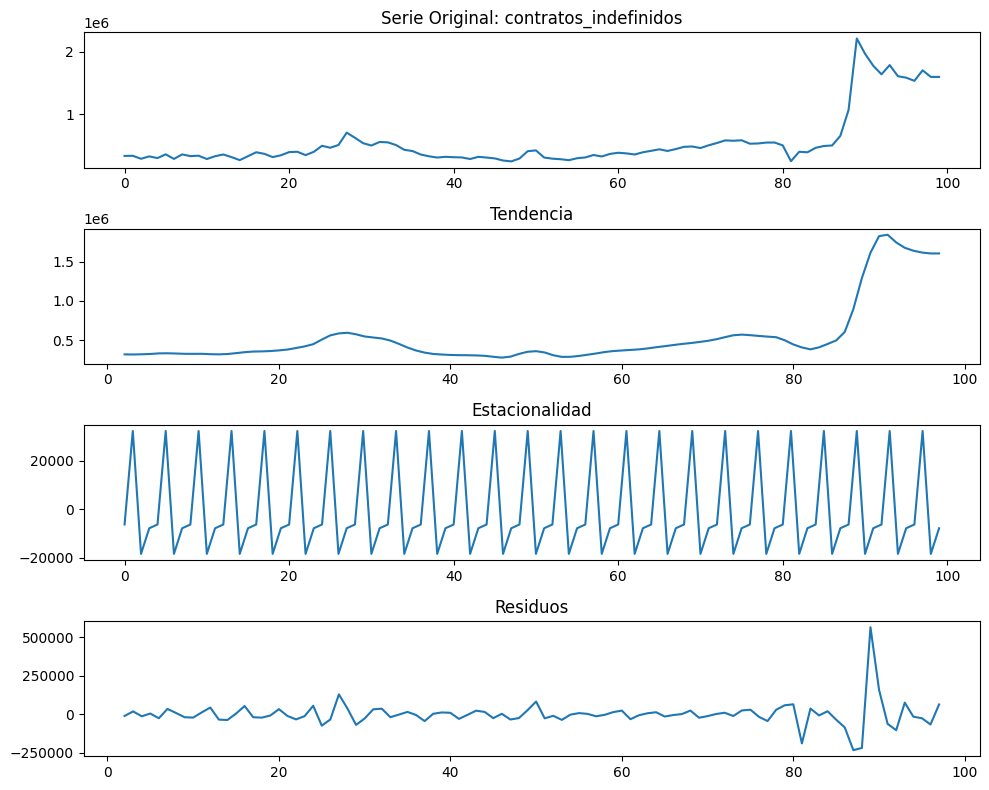

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Cargar el archivo Excel
file_path = "/content/tabla_paro_ordenada.xlsx"
xls = pd.ExcelFile(file_path)

# Cargar la hoja de interés
sheet_name = "TABLA"
df = pd.read_excel(xls, sheet_name=sheet_name)

# Eliminar la columna de fechas o índices si no es numérica
df = df.iloc[:, 1:]

# Descomposición de cada serie temporal
periodo = 4  # Periodo trimestral

for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:  # Solo aplicar a columnas numéricas
        try:
            descomposicion = seasonal_decompose(df[column].dropna(), model='additive', period=periodo)
            fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
            descomposicion.observed.plot(ax=ax1)
            ax1.set_title(f"Serie Original: {column}")
            descomposicion.trend.plot(ax=ax2)
            ax2.set_title("Tendencia")
            descomposicion.seasonal.plot(ax=ax3)
            ax3.set_title("Estacionalidad")
            descomposicion.resid.plot(ax=ax4)
            ax4.set_title("Residuos")
            plt.tight_layout()
            plt.show()
        except ValueError as e:
            print(f"No se pudo descomponer la serie {column}: {e}")

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Cargar el archivo
file_path = "/content/tabla_paro_diferenciada.xlsx"
df = pd.read_excel(file_path)

# Filtrar solo columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# 1️ Realizar el test de Dickey-Fuller para cada variable numérica
adf_results = []

for col in df_numeric.columns:
    result = adfuller(df_numeric[col].dropna())  # Eliminar NaN antes del test
    adf_stat = result[0]  # Estadístico ADF
    p_value = result[1]  # p-valor
    critical_value = result[4]["5%"]  # Valor crítico al 5%

    # Determinar si la serie es estacionaria
    estacionaria = "Estacionaria" if adf_stat < critical_value and p_value < 0.05 else "No estacionaria"

    adf_results.append([col, adf_stat, p_value, estacionaria])

# Crear DataFrame con los resultados (sin la columna de valor crítico)
adf_table = pd.DataFrame(adf_results, columns=["Variable", "Estadístico ADF", "P-valor", "Resultado"])

# Mostrar la tabla
print(" Resultados del Test de Dickey-Fuller:")
display(adf_table)


📊 Resultados del Test de Dickey-Fuller:


,Variable,Estadístico ADF,P-valor,Resultado
0,tasa_paro,-6.025626,1.458324e-07,Estacionaria
1,poblacion,-13.229973,9.628869e-25,Estacionaria
2,PIB,-3.785628,3.057835e-03,Estacionaria
3,coste_laboral,-5.109186,1.343482e-05,Estacionaria
4,IPC,-4.362457,3.456901e-04,Estacionaria
5,empresas_creadas,-11.711348,1.486399e-21,Estacionaria
6,salario_medio,-6.917343,1.170253e-09,Estacionaria
7,contratos_indefinidos,-8.762468,2.651344e-14,Estacionaria
